#El Modelo de Ising 1D
El Modelo de Ising 1D es el ejemplo más fundamental y simple de un sistema de espines que interactúan en mecánica estadística. Representa una cadena lineal de $N$ espines, donde cada espín $s_i$ solo puede tomar dos valores: "arriba" ($+1$) o "abajo" ($-1$).La característica clave es que cada espín solo interactúa con sus vecinos más cercanos.La Energía (Hamiltoniano)La energía total de una configuración (un "estado" $S = \{s_1, s_2, \dots, s_N\}$) se define por el Hamiltoniano:
$$E(S) = -J \sum_{i=1}^{N-1} s_i s_{i+1}, $$
donde $J$ (Acoplamiento) es la fuerza de interacción entre vecinos. Si $J > 0$ (ferromagnético), los espines prefieren alinearse (ej., $\uparrow\uparrow$ o $\downarrow\downarrow$). Si $J < 0$ (antiferromagnético), los espines prefieren antialinearse (ej., $\uparrow\downarrow$).

Consideramos un "anillo" (con condiciones de borde periódicas), por lo tanto en $\sum_{i=1}^{N} s_i s_{i+1}$, tomamos la ultima pareja asi $s_{N+1} = s_1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50  # Longitud de la cadena (nuestro sistema 1D)
J = 1  # Fuerza de acoplamiento
ET = 0.5 # Temperatura
pasos = 1000000 # Número de iteraciones
rng = np.random.default_rng() # instantiate el generador de numeros aleatorios

In [2]:
def energia_total_1d(espines, J=1.0):
    energia = 0.0
    n = len(espines)
    for i in range(n):
        energia -= J * espines[i] * espines[(i + 1) % n]
    return energia

In [3]:
espines = rng.choice([-1, 1], N)
espines0 = espines.copy()
espines_arreglo = [espines0]
energias = [energia_total_1d(espines0)]

for i in range(pasos):
    # cambiar el estado a partir del actual
    i_prop = rng.integers(0, N)
    #identificar el espin
    s_i = espines[i_prop]

    # Usamos % N para condiciones de borde periódicas (un "anillo")
    # si es el ultimo o el primero
    s_izquierda = espines[(i_prop - 1) % N]
    s_derecha   = espines[(i_prop + 1) % N]

    # Cambio en la energia
    delta_E = 2 * J * s_i * (s_izquierda + s_derecha)

    # c. Regla de Aceptación de Metropolis
    if delta_E < 0:
        # Aceptar si la energía baja
        espines[i_prop] *= -1
    elif rng.random() < np.exp(-delta_E / ET):
        # Aceptar con probabilidad si la energía sube
        espines[i_prop] *= -1
    # si no se cumple las dos condiciones anteriores el estado queda igual
    espines_arreglo.append(espines.copy()) # copia para que no sea el mismo arreglo
    energias.append(energia_total_1d(espines))


paso = 0


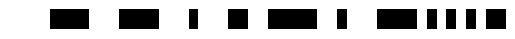

paso = 100000


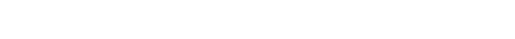

paso = 200000


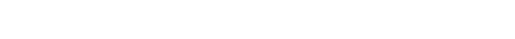

paso = 300000


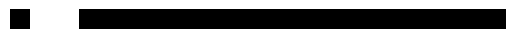

paso = 400000


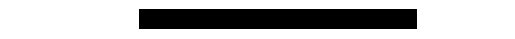

paso = 500000


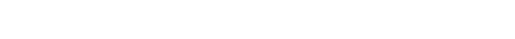

paso = 600000


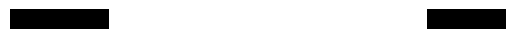

paso = 700000


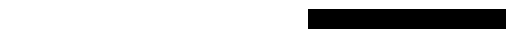

paso = 800000


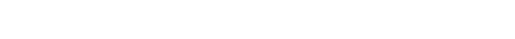

paso = 900000


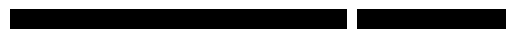

paso = 1000000


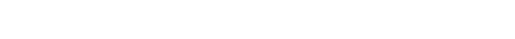

In [4]:
for i in range(10+1):
  nn = int(i*pasos/10)
  print(f'paso = {nn}')
  fig, ax = plt.subplots()
  ax.imshow([espines_arreglo[nn]], cmap='binary', aspect='auto', interpolation='nearest')
  ax.axis('off')
  ax.set_aspect(2)
  plt.show()

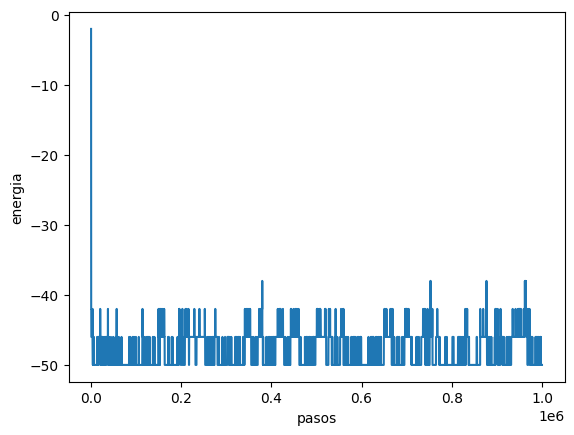

In [ ]:
plt.plot(energias)
plt.xlabel('pasos')
plt.ylabel('energia')
plt.show()